In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/honeyproduction.csv'

Mounted at /content/drive


Modeling a Decision Tree for Regression to Predict the Price Per
Pound of Honey with 67% Testing Accuracy and 5% difference between training and testing accuracy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df=pd.read_csv(path)
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


In [ ]:
df_numeric=df.select_dtypes(include='number')
df_numeric=df_numeric.drop('priceperlb',axis=1)

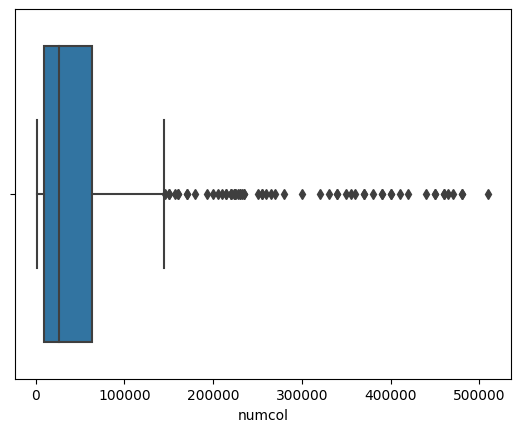

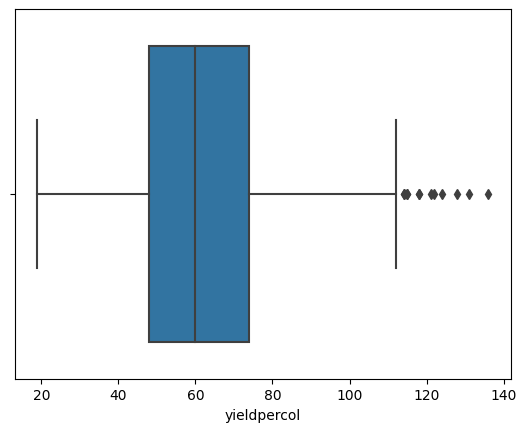

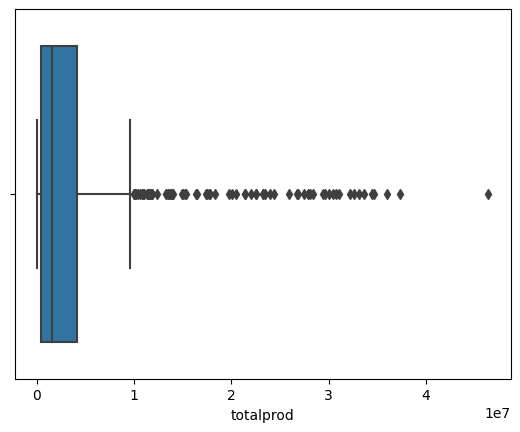

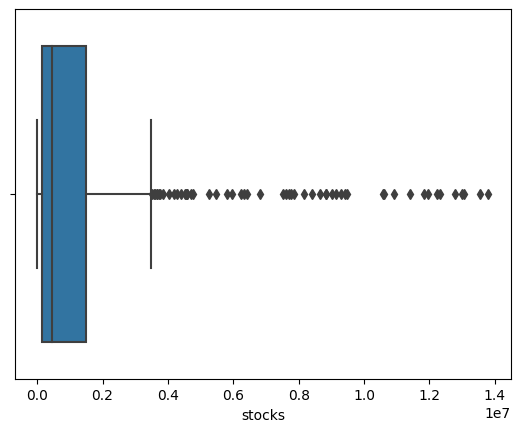

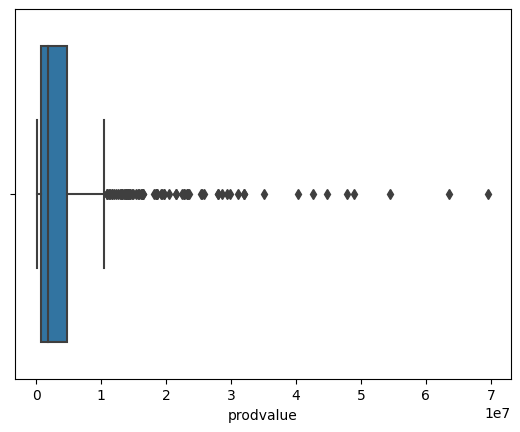

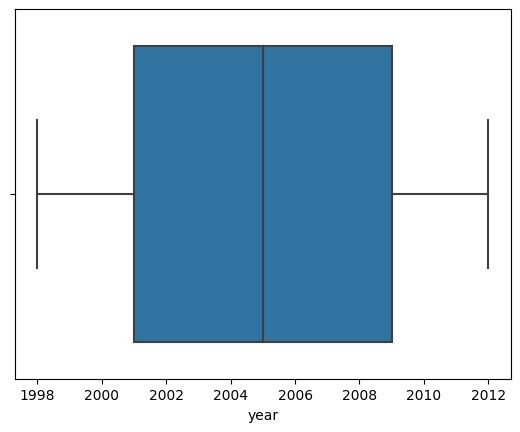

In [ ]:
for i in df_numeric.columns:
  sns.boxplot(data=df_numeric,x=df_numeric[i])
  plt.show()

In [ ]:
def treat_outliers(column_name):
  q1=df_numeric[column_name].quantile(0.25)
  q3=df_numeric[column_name].quantile(0.75)
  iqr=q3-q1
  lower_lim=q1-(1.5*iqr)
  upper_lim=q3+(1.5*iqr)
  for i in df_numeric[column_name]:
    if i<lower_lim:
      df_numeric[column_name]=df_numeric[column_name].replace(i,lower_lim)
    if i>upper_lim:
      df_numeric[column_name]=df_numeric[column_name].replace(i,upper_lim)

In [ ]:
for i in df_numeric.columns:
  treat_outliers(i)

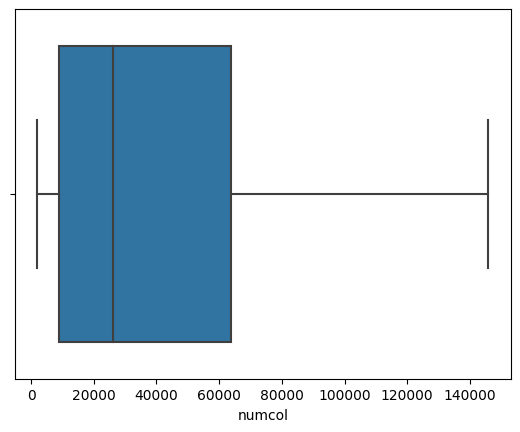

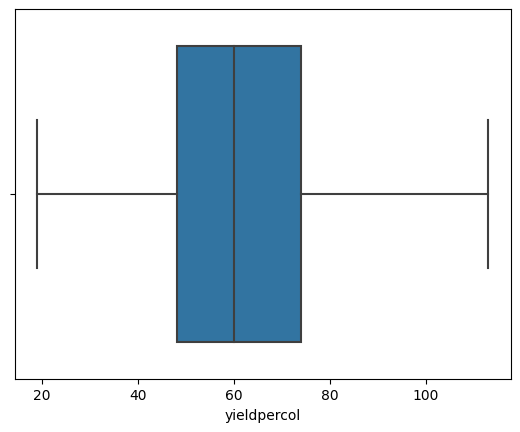

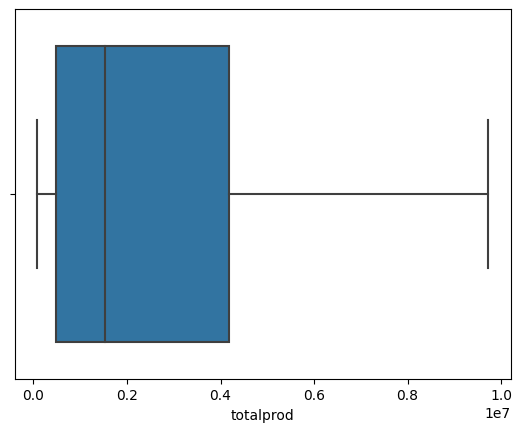

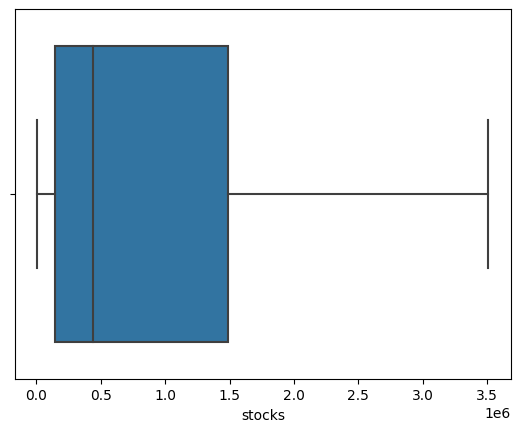

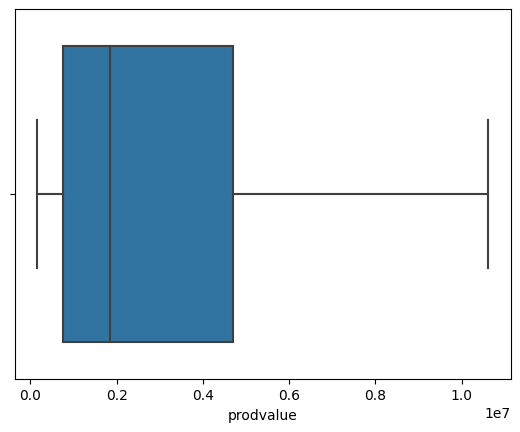

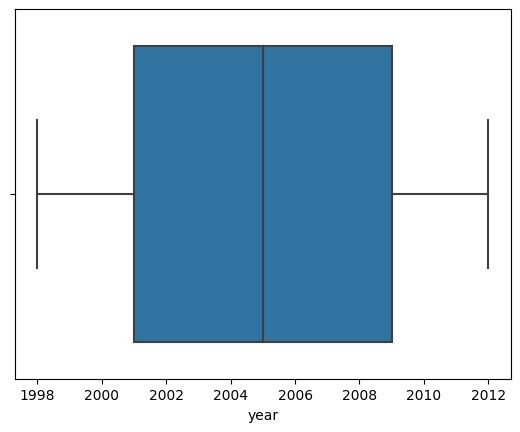

In [ ]:
for i in df_numeric.columns:
  sns.boxplot(data=df_numeric,x=df_numeric[i])
  plt.show()

In [ ]:
y=df['priceperlb']

In [ ]:
for i in df.columns:
  if df[i].dtype!='object':
    df=df.drop(i,axis=1)
df=pd.concat([df,df_numeric],axis=1)

In [ ]:
print(df['state'].value_counts())

AL    15
SD    15
NJ    15
NM    15
NY    15
NC    15
ND    15
OH    15
OR    15
PA    15
TN    15
MT    15
TX    15
UT    15
VT    15
VA    15
WA    15
WV    15
WI    15
WY    15
AZ    15
NE    15
MO    15
IN    15
AR    15
CA    15
CO    15
FL    15
GA    15
HI    15
ID    15
IL    15
IA    15
KS    15
KY    15
LA    15
ME    15
MI    15
MN    15
MS    15
NV    11
OK     6
MD     6
SC     3
Name: state, dtype: int64


In [ ]:
df=pd.get_dummies(data=df)

In [ ]:
X=df
print(X.head())

     numcol  yieldpercol  totalprod     stocks   prodvalue  year  state_AL  \
0   16000.0           71  1136000.0   159000.0    818000.0  1998         1   
1   55000.0           60  3300000.0  1485000.0   2112000.0  1998         0   
2   53000.0           65  3445000.0  1688000.0   2033000.0  1998         0   
3  145875.0           83  9725625.0  3509250.0  10619250.0  1998         0   
4   27000.0           72  1944000.0  1594000.0   1361000.0  1998         0   

   state_AR  state_AZ  state_CA  ...  state_SD  state_TN  state_TX  state_UT  \
0         0         0         0  ...         0         0         0         0   
1         0         1         0  ...         0         0         0         0   
2         1         0         0  ...         0         0         0         0   
3         0         0         1  ...         0         0         0         0   
4         0         0         0  ...         0         0         0         0   

   state_VA  state_VT  state_WA  state_WI  state_W

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
regressor = DecisionTreeRegressor(random_state = 42).fit(X_train,y_train)

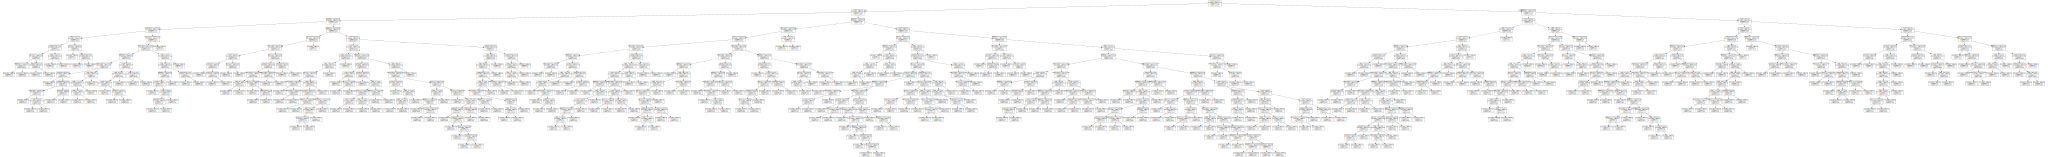

In [ ]:
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =X_train.columns)
graphviz.Source.from_file('tree.dot')

In [ ]:
training_score=regressor.score(X_train,y_train)
print(training_score)

1.0


In [ ]:
testing_score=regressor.score(X_test,y_test)
print(testing_score)
#Training score is 100% while testing score is 68% so clearly the model is overfit

0.7975076099829732


In [ ]:
regressor = DecisionTreeRegressor(random_state = 42,ccp_alpha=0.1).fit(X_train,y_train)

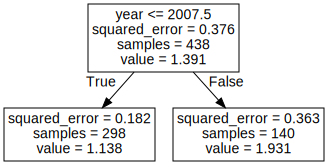

In [ ]:
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =X_train.columns)
graphviz.Source.from_file('tree.dot')
#tree is really shortened from before

In [ ]:
training_score=regressor.score(X_train,y_train)
print(training_score)

0.363350756622825


In [ ]:
testing_score=regressor.score(X_test,y_test)
print(testing_score)
#training and testing scores are really low so model is underfit as alpha value is really high and we pruned the main nodes

0.3903819353382504


In [ ]:
regressor = DecisionTreeRegressor(random_state = 42,ccp_alpha=0.01).fit(X_train,y_train)

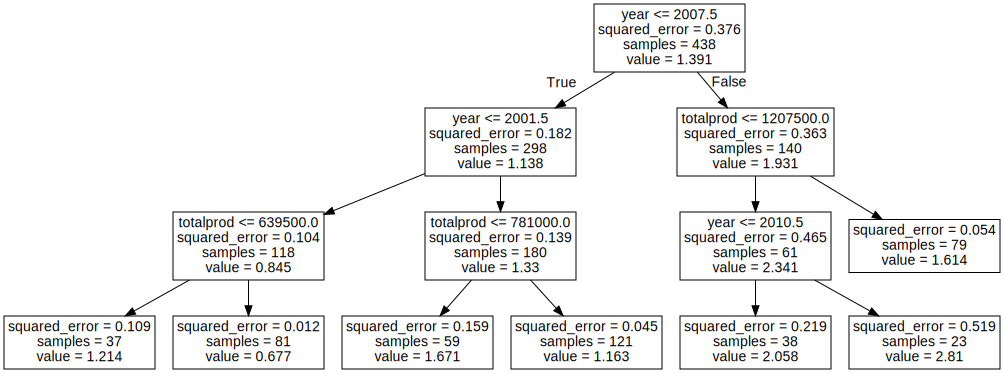

In [ ]:
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =X_train.columns)
graphviz.Source.from_file('tree.dot')


In [ ]:
training_score=regressor.score(X_train,y_train)
print(training_score)

0.7310336890308289


In [ ]:
testing_score=regressor.score(X_test,y_test)
print(testing_score)
#there is still room for improvement so lets change alpha again

0.6789615863269823


In [ ]:
regressor = DecisionTreeRegressor(random_state = 42,ccp_alpha=0.008).fit(X_train,y_train)

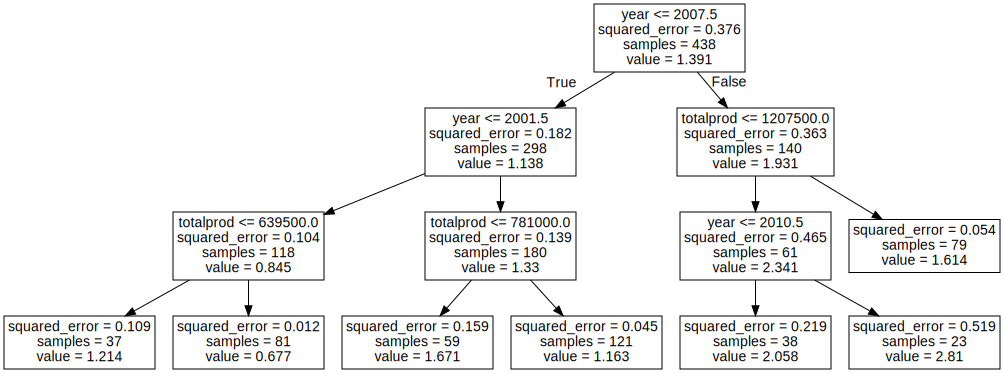

In [ ]:
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =X_train.columns)
graphviz.Source.from_file('tree.dot')

In [ ]:
training_score=regressor.score(X_train,y_train)
print(training_score)

0.7310336890308289


In [ ]:
testing_score=regressor.score(X_test,y_test)
print(testing_score)
#this the best we can get

0.6789615863269823
